# Total Monetary Value by Agency #

In [1]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def get_spending_data(start_date, end_date):
    base_url = "https://api.usaspending.gov/api/v2/search/spending_by_award/"
    
    agency_object = {
        "type": "awarding",  
        "tier": "toptier",   
        "name": "Department of Defense"  
    }
    
    payload =   {
      "subawards": False,
      "limit": 100,
      "page": 1,
      "filters": {
          "award_type_codes": ["A", "B", "C"],
            "time_period": [
                {
                    "start_date": start_date,
                    "end_date": end_date
                }
            ],
          "agencies": [agency_object],
        #   "sort": "-Award Amount"
      },
      "fields": [
          "Recipient Name",
          "Start Date",
          "End Date",
          "Award Amount",
        #   "Awarding Agency",
        #   "Contract Award Type",
        #   "Award Type",
          "Funding Agency",
      ]
  }
    
    response = requests.post(base_url, json=payload)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

def annual_spending_range(start_year, end_year):
    annual_spending = {}

    for year in range(start_year, end_year):
        start_date = f"{year}-01-01"
        end_date = f"{year + 1}-01-01"  

        result = get_spending_data(start_date, end_date)
        print(result)
        
        total_spending = 0
        for item in result['results']:
            total_spending += item['Award Amount']
        print(f"Total spending in {year}: ${total_spending:,}")
        # print(result['results'][0]['Award Amount'])
        
        if result and 'results' in result and len(result['results']) > 0:
            annual_spending[year] = total_spending
        else:
            annual_spending[year] = 0

    return annual_spending

def plot_annual_spending(start_year, end_year):
    data = annual_spending_range(start_year, end_year)

    years = list(data.keys())
    amounts = list(data.values())
    df = pd.DataFrame({'Year': years, 'Amount': amounts})

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x="Year", y="Amount", data=df)
    
    plt.xlabel('Year')
    plt.ylabel('Total Contract Value')
    title = f'Department of Defense (DoD) Contract Value Over the Years'
    plt.title(title)

    plt.show()

# Example usage:
start_year = 2008
end_year = 2023

plot_annual_spending(start_year, end_year)
# get_spending_data(start_year, end_year)
# annual_spending_range(start_year, end_year)

{'limit': 100, 'results': [{'internal_id': 37788321, 'Recipient Name': 'ZZOUNDS MUSIC, L.L.C.', 'Start Date': '2008-09-30', 'End Date': '2008-10-30', 'Award Amount': 3799.6, 'Funding Agency': 'Department of Defense', 'generated_internal_id': 'CONT_AWD_W9124308M0143_9700_-NONE-_-NONE-'}, {'internal_id': 37788274, 'Recipient Name': 'ZZOUNDS MUSIC, L.L.C.', 'Start Date': '2008-07-03', 'End Date': '2008-08-05', 'Award Amount': 6649.16, 'Funding Agency': 'Department of Defense', 'generated_internal_id': 'CONT_AWD_W9124308M0095_9700_-NONE-_-NONE-'}, {'internal_id': 14667067, 'Recipient Name': 'ZZOUNDS MUSIC, L.L.C.', 'Start Date': '2008-09-12', 'End Date': '2008-09-26', 'Award Amount': 8620.2, 'Funding Agency': 'Department of Defense', 'generated_internal_id': 'CONT_AWD_FA304708P0927_9700_-NONE-_-NONE-'}, {'internal_id': 37506705, 'Recipient Name': 'ZYRIS, INC.', 'Start Date': '2008-07-29', 'End Date': '2008-08-31', 'Award Amount': 6481.0, 'Funding Agency': 'Department of Defense', 'generate

ReadTimeout: HTTPSConnectionPool(host='api.usaspending.gov', port=443): Read timed out. (read timeout=None)

In [16]:
import requests

# Define the API endpoint URL
api_url = "https://api.usaspending.gov/api/v2/references/toptier_agencies/"

# Make an HTTP GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Find the Department of Defense (DoD) agency ID
    for agency in data['results']:
        if agency['agency_name'] == "Department of Defense":
            dod_agency_id = agency['toptier_code']
            print(f"Department of Defense (DoD) Agency ID: {dod_agency_id}")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Department of Defense (DoD) Agency ID: 097


Fiscal Year 2017:
Budget Authority Amount: $220,459,743,630.97
Obligated Amount: $163,075,192,516.58
Outlay Amount: $156,574,733,852.50

Fiscal Year 2018:
Budget Authority Amount: $224,372,520,297.27
Obligated Amount: $157,671,655,471.61
Outlay Amount: $157,949,746,427.49

Fiscal Year 2019:
Budget Authority Amount: $242,451,803,717.47
Obligated Amount: $170,898,908,395.86
Outlay Amount: $167,254,596,200.59

Fiscal Year 2020:
Budget Authority Amount: $322,370,908,923.19
Obligated Amount: $239,791,172,810.38
Outlay Amount: $204,224,784,766.71

Fiscal Year 2021:
Budget Authority Amount: $392,371,979,973.22
Obligated Amount: $277,306,542,292.14
Outlay Amount: $255,908,949,949.30

Fiscal Year 2022:
Budget Authority Amount: $431,862,412,285.90
Obligated Amount: $276,349,737,150.23
Outlay Amount: $268,529,379,297.85

Fiscal Year 2023:
Budget Authority Amount: $502,760,433,117.76
Obligated Amount: $251,351,142,319.37
Outlay Amount: $232,528,234,968.40



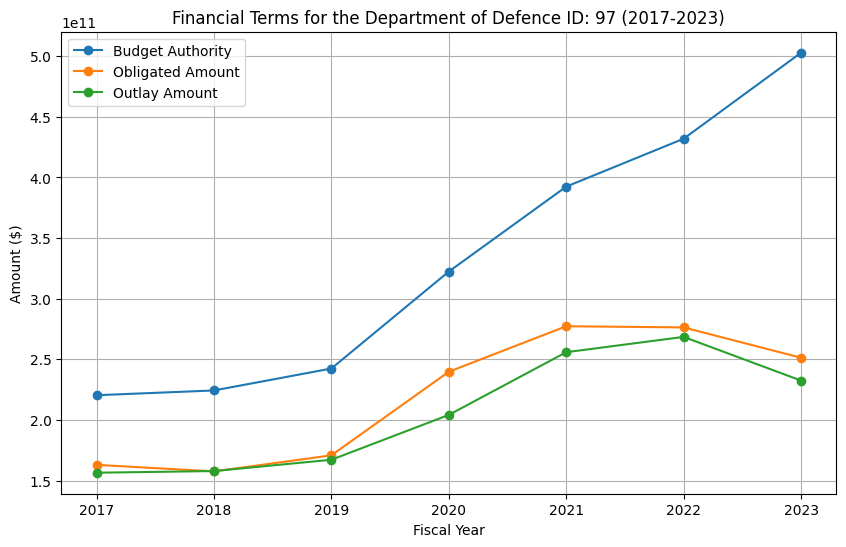

In [19]:
import requests
import matplotlib.pyplot as plt

# Define the API endpoint URL
api_url = "https://api.usaspending.gov/api/v2/financial_balances/agencies/"

# Specify the funding agency ID (e.g., 97) and the range of fiscal years (e.g., 2017 to 2023)
funding_agency_id = 97
start_year = 2017
end_year = 2023

def financial_balances():
    years = []
    budget_authority_values = []
    obligated_amount_values = []
    outlay_amount_values = []

    for fiscal_year in range(start_year, end_year + 1):
        params = {
            "fiscal_year": fiscal_year,
            "funding_agency_id": funding_agency_id
        }

        try:
            response = requests.get(api_url, params=params)
            response.raise_for_status()
            data = response.json()

            budget_authority = float(data['results'][0]['budget_authority_amount'])
            obligated_amount = float(data['results'][0]['obligated_amount'])
            outlay_amount = float(data['results'][0]['outlay_amount'])

            years.append(fiscal_year)
            budget_authority_values.append(budget_authority)
            obligated_amount_values.append(obligated_amount)
            outlay_amount_values.append(outlay_amount)

            print(f"Fiscal Year {fiscal_year}:\n"
                  f"Budget Authority Amount: ${budget_authority:,.2f}\n"
                  f"Obligated Amount: ${obligated_amount:,.2f}\n"
                  f"Outlay Amount: ${outlay_amount:,.2f}\n")

        except requests.exceptions.RequestException as e:
            print(f"Request failed for fiscal year {fiscal_year}: {e}")
        except (KeyError, IndexError):
            print(f"Data format error for fiscal year {fiscal_year}: Check the API response format.")
    return years, budget_authority_values, obligated_amount_values, outlay_amount_values

# Plot the data
years, budget_authority_values, obligated_amount_values, outlay_amount_values = financial_balances()
plt.figure(figsize=(10, 6))
plt.plot(years, budget_authority_values, marker='o', linestyle='-', label='Budget Authority')
plt.plot(years, obligated_amount_values, marker='o', linestyle='-', label='Obligated Amount')
plt.plot(years, outlay_amount_values, marker='o', linestyle='-', label='Outlay Amount')
plt.title(f"Financial Terms for the Department of Defence ID: {funding_agency_id} (2017-2023)")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
import requests

# Define the API endpoint URL for spending by transaction
api_url = "https://api.usaspending.gov/api/v2/search/spending_by_transaction/"

# Specify the funding agency ID (e.g., 97) and the range of fiscal years (2008 to 2017)
funding_agency_id = 97
start_year = 2008
end_year = 2017

def total_spending():
    total_spending_amount = 0

    # Define the request payload according to the API documentation
    request_payload = {
        "filters": {
            "keywords": ["test"],  # You can modify this list of keywords
            "award_type_codes": ["A", "B", "C", "D"]
        },
        "fields": [
            "Award ID",
            "Mod",
            "Recipient Name",
            "Action Date",
            "Transaction Amount",
            "Awarding Agency",
            "Awarding Sub Agency",
            "Award Type"
        ],
        "page": 1,
        "limit": 35,
        "sort": "Transaction Amount",
        "order": "desc"
    }

    for fiscal_year in range(start_year, end_year + 1):
        params = {
            "fiscal_year": fiscal_year,
            "funding_agency_id": funding_agency_id
        }

        try:
            response = requests.post(api_url, json=request_payload, params=params)
            response.raise_for_status()
            data = response.json()

            # Iterate through the transaction results and sum the total spending
            for result in data['results']:
                total_spending_amount += float(result['Transaction Amount'])

            print(f"Fiscal Year {fiscal_year}: Total Spending Amount: ${total_spending_amount:,.2f}")

        except requests.exceptions.RequestException as e:
            print(f"Request failed for fiscal year {fiscal_year}: {e}")
        except (KeyError, IndexError):
            print(f"Data format error for fiscal year {fiscal_year}: Check the API response format.")
    return total_spending_amount

# Calculate and print the total spending
total_spending_amount = total_spending()
print(f"Total Spending by Agency ID {funding_agency_id} from {start_year} to {end_year}: ${total_spending_amount:,.2f}")


Fiscal Year 2008: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2009: Total Spending Amount: $35,110,206,544.86
Fiscal Year 2010: Total Spending Amount: $52,665,309,817.29
Fiscal Year 2011: Total Spending Amount: $70,220,413,089.72
Fiscal Year 2012: Total Spending Amount: $87,775,516,362.15
Fiscal Year 2013: Total Spending Amount: $105,330,619,634.58
Fiscal Year 2014: Total Spending Amount: $122,885,722,907.01
Fiscal Year 2015: Total Spending Amount: $140,440,826,179.44
Fiscal Year 2016: Total Spending Amount: $157,995,929,451.87
Fiscal Year 2017: Total Spending Amount: $175,551,032,724.30
Total Spending by Agency ID 97 from 2008 to 2017: $175,551,032,724.30


In [35]:
# Define the API endpoint URL for spending by transaction
api_url = "https://api.usaspending.gov/api/v2/search/spending_by_transaction/"

# Specify the funding agency ID (e.g., 97) and the range of fiscal years (2008 to 2017)
funding_agency_id = 97
start_year = 2008
end_year = 2017

def total_spending():

    # Define the request payload according to the API documentation
    request_payload = {
        "filters": {
            "keywords": ["test"],  # You can modify this list of keywords
            "award_type_codes": ["A", "B", "C", "D"]
        },
        "fields": ["Transaction Amount"],
        "page": 1,
        "limit": 35,
        "sort": "Transaction Amount",
        "order": "desc"
    }


    total_spending_by_year = {}  # Create a dictionary to store spending by year

    for fiscal_year in range(start_year, end_year + 1):
        params = {
            "fiscal_year": fiscal_year,
            "funding_agency_id": funding_agency_id
        }

        try:
            response = requests.post(api_url, json=request_payload, params=params)
            response.raise_for_status()
            data = response.json()

            # Calculate the total spending for the fiscal year and store it in the dictionary
            total_spending_amount = sum(float(result['Transaction Amount']) for result in data['results'])
            total_spending_by_year[fiscal_year] = total_spending_amount

            print(f"Fiscal Year {fiscal_year}: Total Spending Amount: ${total_spending_amount:,.2f}")

        except requests.exceptions.RequestException as e:
            print(f"Request failed for fiscal year {fiscal_year}: {e}")
        except (KeyError, IndexError):
            print(f"Data format error for fiscal year {fiscal_year}: Check the API response format.")
    return total_spending_by_year

# Calculate and print the total spending per year
total_spending_by_year = total_spending()
for year, spending in total_spending_by_year.items():
    print(f"Fiscal Year {year}: Total Spending Amount: ${spending:,.2f}")


Fiscal Year 2008: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2009: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2010: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2011: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2012: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2013: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2014: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2015: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2016: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2017: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2008: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2009: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2010: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2011: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2012: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2013: Total Spending Amount: $17,555,103,272.43
Fiscal Year 2014: Total Spending Amount: